<a href="https://colab.research.google.com/github/BuhariS/walmart_sales_prediction/blob/main/walmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart's Weekly Sales Prediction

<img src="https://cdn.corporate.walmart.com/dims4/WMT/26fb832/2147483647/strip/true/crop/2400x1332+0+134/resize/980x544!/quality/90/?url=https%3A%2F%2Fcdn.corporate.walmart.com%2Fb6%2Fc6%2F5e1cb86e49f6948b3298e76c1123%2Fpress-hero-1.jpg" alt="image name" style="max-width: 100%;">

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#model">4. Model Selection and Evaluation</a></li>
<li><a href="#conclusions">5. Conclusions</a></li>
<li><a href="#references">6. References</a></li>
</ul>

<div id='intro'></div>

## 1. Introduction


### 1.1 Dataset description
The file `Walmart.csv` was obtained from [Kaggle](https://www.kaggle.com/datasets/yasserh/walmart-dataset) website. It consists of Walmart's weekly sales from 2010-02-05 to 2012-11-01. The file has the following columns:
- `Store`: the store number
- `Date`: the week of sales
- `Weekly_Sales`: sales for the given store
- `Holiday_Flag`: whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- `Temperature`: Temperature on the day of sale
- `Fuel_Price`: Cost of fuel in the region
- `CPI`: Prevailing consumer price index
- `Unemployment`: Prevailing unemployment rate

**Holiday Events** include
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


### 1.2 Installing and importing dependencies
The following packages are essential to running this project successfully: `numpy, pandas, matplotlib, seaborn, sklearn, sidetable, imbalanced-learn and xgboost`.


In [ ]:
#Some installations
! pip install -q sidetable

# installing kaggle
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [1]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import linear regressor
from sklearn.linear_model import LinearRegression

# import metrics
from sklearn import metrics


# import warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.3 Loading the dataset

In [ ]:
# load the dataset
sales = pd.read_csv('/content/drive/MyDrive/DataScience/Projects/walmart sales prediction/walmart.csv')
sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


<div id='wrangling'></div>

## 2. Data Wrangling

**What is the size, data type and are there missing values in the dataset?**

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Aliter
sales.shape

# count missing values
sales.isnull().sum()

# percentage missing values
sales.isnull().sum() / sales.shape[0] * 100

# impute the missing values in the Age column by mean Value
sales['Age'].fillna(sales['Age'].mean(),inplace=True)

sales['Embarked'].fillna(sales['Embarked'].mode().item(),inplace=True)

#check

#rename cols
sales=sales.rename(columns={'Sex':'Gender','Name':'Full Name'})

# adding and modifying cols
sales['last_name']=sales['Full Name'].apply(lambda x: x.split(',')[0])
sales['first_name']=sales['Full Name'].apply(lambda x: ' '.join(x.split(',')[1:]))

#adding rows
row=dict({'Age':24,'Full Name':'Rohith','Survived':'Y'})
sales=sales.append(row,ignore_index=True)
sales.tail()

#delete rows
sales=sales.drop(sales.index[-1],axis=0) # Deletes last row
sales.head()

#encode categorical to numerical for ml
sales['Gender']=sales['Gender'].map({"male":'0',"female":"1"})

Issue #8

Define

Code

Test

**Are there duplicates in the dataset?**

In [ ]:
# count duplicates
sales.duplicated().sum()

0

**Are there outliers in the dataset?**

**What are the summary statistics of the dataset?**

In [ ]:
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<div id='eda'></div>

## 3. Exploratory Data Analysis

**Univariate**

In [ ]:
 sales.skew()

Store           0.000000
Weekly_Sales    0.668362
Holiday_Flag    3.373499
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

In [ ]:
sales.kurtosis()

Store          -1.201187
Weekly_Sales    0.053141
Holiday_Flag    9.383410
Temperature    -0.612801
Fuel_Price     -1.177378
CPI            -1.839813
Unemployment    2.639712
dtype: float64

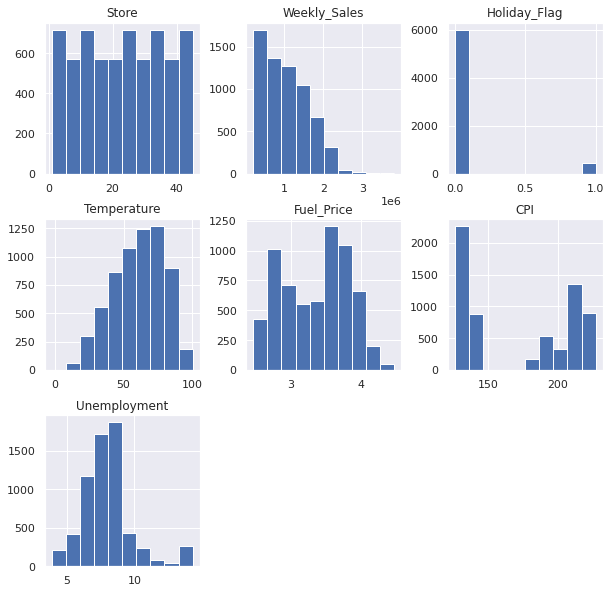

In [ ]:
# histograms

sales.hist(figsize=(10,10));

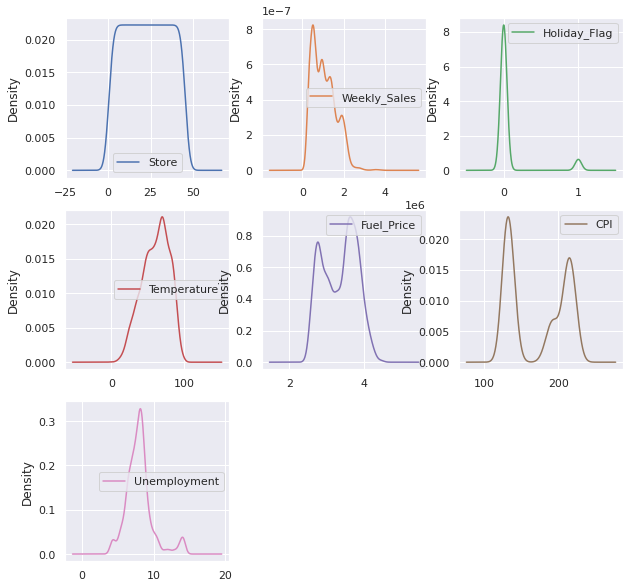

In [ ]:
# density plot
sales.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10));

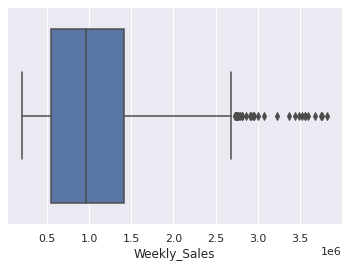

In [ ]:
# box plot
sns.boxplot(x='Weekly_Sales', data=sales);

In [ ]:
# violin plot
sns.violinplot(x='bmi', data=sales);

**Multivariate**

In [ ]:
sales.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


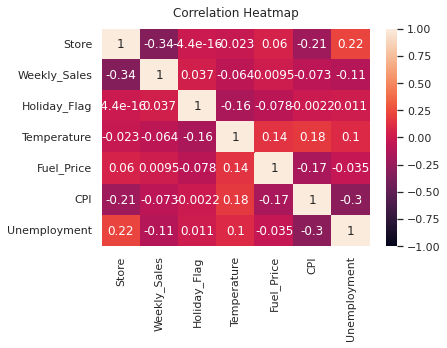

In [ ]:
heatmap = sns.heatmap(sales.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# clustered bar chart


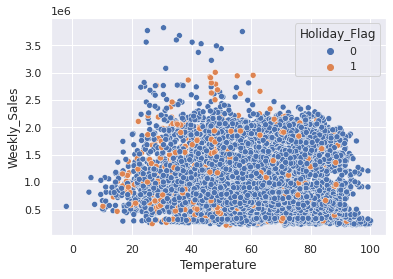

In [ ]:
# scatter plot
sns.scatterplot(x='Temperature',y='Weekly_Sales',hue='Holiday_Flag', data=sales);

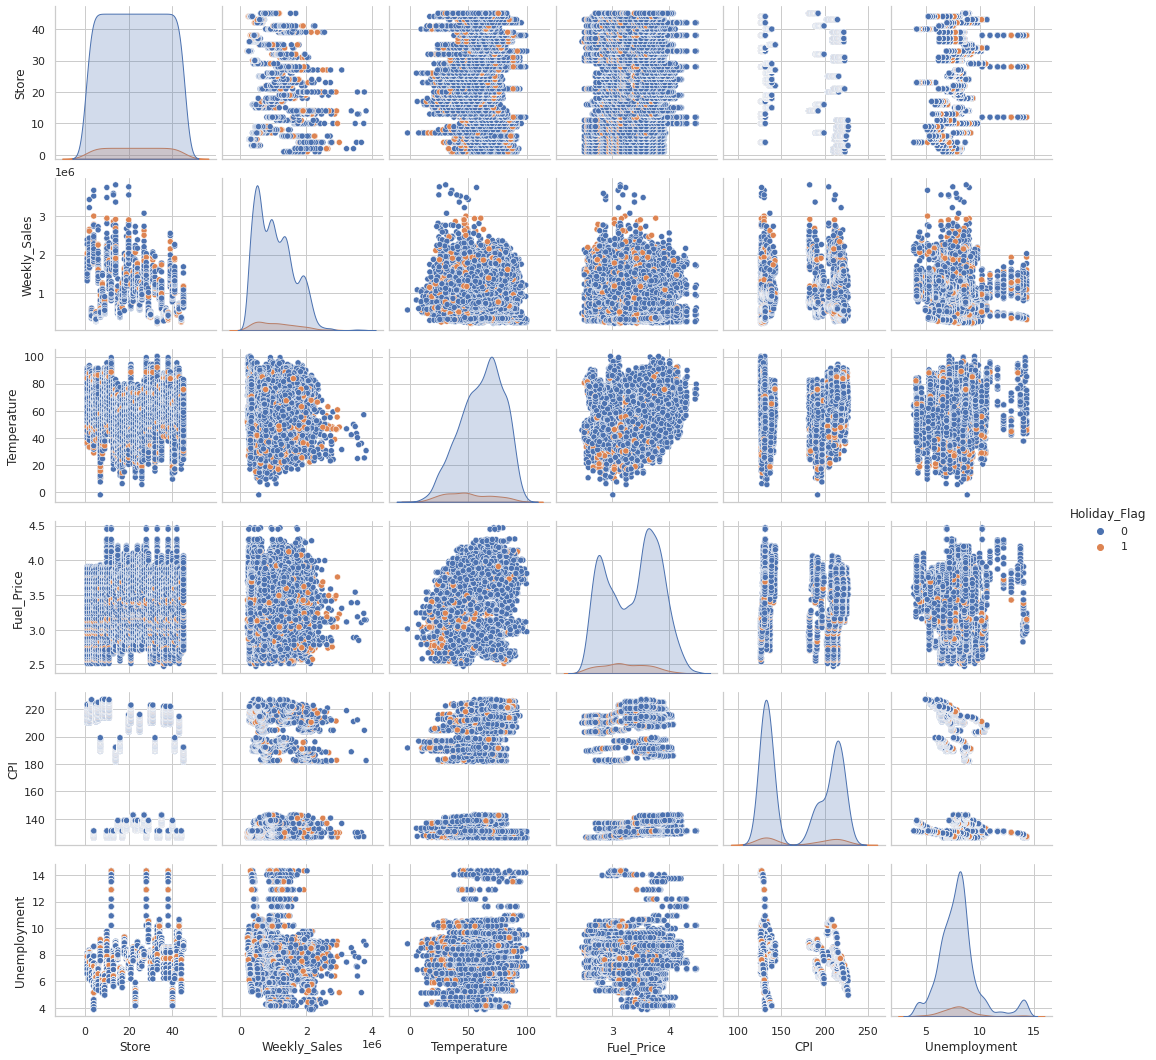

In [ ]:
# pair plot

sns.set_style("whitegrid");
sns.pairplot(sales, hue="Holiday_Flag");
plt.show();

In [ ]:
# bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(x="bmi",
                y="claim_amount",
                size="children",
                sizes=(20,100),
                alpha=0.8,
                hue="smoker",
                data=sales);

In [ ]:
# joint plot
sns.jointplot(x = 'age', y = 'bmi', data = sales);
 
sns.jointplot(x = 'age', y = 'bmi', data = sales, hue='insurance_claim');

In [ ]:
# line plot
plt.plot(np.arange(len(sales.Y)), sales.Y)
plt.title("ZAR/USD over time")
plt.xlabel("Months")
plt.ylabel("ZAR/USD")
plt.show()

In [ ]:
# 2 in 1 line plot
from matplotlib import rc
rc('mathtext', default='regular')
# Create blank figure
fig = plt.figure()


# Split figure to allow two sets of y axes
ax = fig.add_subplot(111)


# Plot the first line on its axis
ax.plot(np.arange(len(sales.Y)), sales.Y, '-', label = 'ZAR/USD', color='orange')


# Create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(sales.X)), sales.X, '-', label = 'Exports (ZAR)')


# Add legends for each axis
ax.legend(loc=2)
ax2.legend(loc=9)


ax.grid()


# Set labels of axes
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()


**Issues**

***Predictors issues***
- `linearity`: when we see that the Xs are not linear from the scatter plots of Xs and y we may need to transform the Xs and/or y with functions like log(x) and check to see if there is linearity then apply a linear function.
- `collinearity`/- `multicollinearity`: when Xs are correlated with one another. This makes it hard to determine the effect of Xs on y. Similar to collinearity. This can be checked with varience inflation factor (VIF). **0-5 good, 6-10: pay attention can remove and leave one of those, >10 remove**

If we fit a regression model to a dataset that is non-linear, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. In order to check for linearity, we can produce scatter plots of each individual predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(sales.columns):
    axs[index-1].set_title("{} vs. mpg".format(column),fontsize=16)
    axs[index-1].scatter(x=sales[column],y=sales['mpg'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)


Checking for Multicollinearity
Multicollinearity refers to the presence of strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

It tends to increase the standard error;

It becomes difficult to estimate the effect of any one predictor variable on the response variable.

We will check for multicollinearity by generating pairwise scatter plots among predictors, and further, generating a correlation heatmap.

In [ ]:
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
g = pairplot(sales1.drop('mpg', axis='columns'))
g.fig.set_size_inches(9,9)


***residuals issues***
- `independence/ autocorrelation` when there is correlation between **residuals**. This is not desirable. It is abd especially for time series models. This can be checked by plotting the residuals and check for rectangular patterns. Can also be checked using Durbin-Watson stat: desired value approx 2, 0-2 positive autocorrelation, 2-4 negative autocorrelation
- `homoscadacity`: constant varience among residuals for all fitted values. this makes it difficult to guage the standard deviation or error of the forecast prediction., narrow confidence interval. This can be checked by plotting residuals against predicted y. We seek a recatangular pattern not funnel one.
- `normality`: errors/residuals are generated from normal distribution: may not be necessary, check with quantile-quantile plot, shapiro will

<div id='model'></div>

## 4. Model Selection and Evaluation

In [ ]:
sales1 = sales.copy()

In [ ]:
# get the predictor and the predicted variables
X = sales.drop(['col'], axis=1)
y = sales['col']

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
# instantiatiating the model
lm = LinearRegression()

In [ ]:
# fitting the model
lm.fit(X_train, y_train)

#without splitting
X = sales.X[:,np.newaxis] # convert shape of X from (n,) to (n,1)
lm.fit(X, y)

**Evaluating the model on train set: how well the line fits the data**

In [ ]:
# prediction
# generate values of y from x, using the linear model
y_pred = lm.predict(X_train)

In [ ]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred))

In [ ]:
# Multiple MSE by N to get RSS
print("Residual sum of squares:", metrics.mean_squared_error(y_train, y_pred)*len(X))

In [ ]:
print('R_squared:', metrics.r2_score(y_train, y_pred))

In [ ]:
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y_train, y_pred))

In [ ]:
# for slr
# plot the results
plt.scatter(X, y)  # plot the original data
plt.plot(X, gen_y, color='red')  # plot the line connecting the generated y-values
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

**Testing the model on test set**

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
print("Testing:")
print('MSE:', metrics.mean_squared_error(y_test, gen_y_test))
print('R_squared:', metrics.r2_score(y_test, gen_y_test))

In [ ]:
# evaluating MLR
from sklearn import metrics
import math

# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

**Note**
If Mean squared error is higher on the test set than the train set, indicating poor predictive accuracy, and R-squared is lower on the test set, indicating a worse fit on the test set.

These results indicate a concept in machine learning model fitting known as overfitting. This is a phenomenon where there is:

A discrepancy between the performance of the model on train and on test sets; and
An inability of the model to generalise to data it has not seen before.
The term comes from the fact that the model fits too well, or overfits, the training data, and does not fit well, or underfits, the testing data.

In the trains to follow, we'll look at ways to improve model performance as well as prevent or mitigate overfitting.

**Note**

For big dataset we can have 3 splits: train, validation and test splits. The validation is used to check improvement in hyperparameter tuning. After we are satisfied with that we then use the test set.

For small dataset where we can't afford 3 splits we can use cross-validation like k-fold. This can be used to prevent overfitting.

**Stat model**

SK Learn is limited in terms of metrics

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
# generating string for regression

formula_str = sales1.columns[0]+' ~ '+'+'.join(sales1.columns[1:]); formula_str

# the model 
model=sm.ols(formula=formula_str, data=sales1)
fitted = model.fit()
# print model stats
print(fitted.summary())

<div id='conclusions'></div>

## 5. Conclusions

<div id='references'></div>

## 6. References

[Kaggle](https://www.kaggle.com/datasets/yasserh/walmart-dataset)